In [1]:
cd "C:\Users\jmich\OneDrive\Repository\Python Practice Datasets\San Antonio Occupation Profiles"

C:\Users\jmich\OneDrive\Repository\Python Practice Datasets\San Antonio Occupation Profiles


### Data from US Bureau of Labor Statistics 
##### Occupational Employment and Wage Statistics
###### source website - https://www.bls.gov/oes/tables.htm 

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import os
import re

In [3]:
# I want to analyze 2015 -2020 this will combine all the datasets into a dataframe and add a Year column as an indicator to seperate the datasets
df = pd.DataFrame()
for folders in os.listdir(): 
    if re.search('oesm\d+', folders):
        for file in os.listdir(folders): 
            if re.search(r'^M', file):
                year = int(file[5:9])
                file_loc = os.getcwd() + '\\' + folders + '\\' + file
                print(year, file)
                print(file_loc)
                one = pd.read_excel(file_loc)
                one['YEAR'] = year
                if year == 2019:
                    one.columns = one.columns.str.upper()
                    one.rename(columns = {'AREA_TITLE': 'AREA_NAME'}, inplace = True)
                if year > 2019: one.rename(columns = {'AREA_TITLE': 'AREA_NAME'}, inplace = True)
                df = df.append(one)

2015 MSA_M2015_dl.xlsx
C:\Users\jmich\OneDrive\Repository\Python Practice Datasets\San Antonio Occupation Profiles\oesm15ma\MSA_M2015_dl.xlsx
2016 MSA_M2016_dl.xlsx
C:\Users\jmich\OneDrive\Repository\Python Practice Datasets\San Antonio Occupation Profiles\oesm16ma\MSA_M2016_dl.xlsx
2017 MSA_M2017_dl.xlsx
C:\Users\jmich\OneDrive\Repository\Python Practice Datasets\San Antonio Occupation Profiles\oesm17ma\MSA_M2017_dl.xlsx
2018 MSA_M2018_dl.xlsx
C:\Users\jmich\OneDrive\Repository\Python Practice Datasets\San Antonio Occupation Profiles\oesm18ma\MSA_M2018_dl.xlsx
2019 MSA_M2019_dl.xlsx
C:\Users\jmich\OneDrive\Repository\Python Practice Datasets\San Antonio Occupation Profiles\oesm19ma\MSA_M2019_dl.xlsx
2020 MSA_M2020_dl.xlsx
C:\Users\jmich\OneDrive\Repository\Python Practice Datasets\San Antonio Occupation Profiles\oesm20ma\MSA_M2020_dl.xlsx


In [4]:
df.to_excel('us_labor_stats_2015_to_2020.xlsx', index = False)

In [5]:
df = pd.read_excel('us_labor_stats_2015_to_2020.xlsx')

In [6]:
print(df.shape)
df.head()
#### going to filter the data set down to save on processing

(900140, 34)


,PRIM_STATE,AREA,AREA_NAME,OCC_CODE,OCC_TITLE,OCC_GROUP,TOT_EMP,EMP_PRSE,JOBS_1000,LOC QUOTIENT,...,HOURLY,YEAR,AREA_TYPE,NAICS,NAICS_TITLE,I_GROUP,OWN_CODE,O_GROUP,LOC_QUOTIENT,PCT_TOTAL
0,AK,11260,"Anchorage, AK",00-0000,All Occupations,total,177210,2.2,1000,1,...,NaN,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AK,11260,"Anchorage, AK",11-0000,Management Occupations,major,10090,2.5,56.937,1.13,...,NaN,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AK,11260,"Anchorage, AK",11-1011,Chief Executives,detailed,490,5.2,2.751,1.59,...,NaN,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AK,11260,"Anchorage, AK",11-1021,General and Operations Managers,detailed,3460,3.7,19.511,1.25,...,NaN,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AK,11260,"Anchorage, AK",11-2011,Advertising and Promotions Managers,detailed,40,26.3,0.248,1.16,...,NaN,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#filtering the data down to just "DATA" jobs
df = df.dropna(subset = ['OCC_TITLE'])
print(df.shape)
data_job = []
jobs =  df['OCC_TITLE'].unique()
for job in jobs:
    if re.search('d+a+t+a+', job, flags=re.IGNORECASE):
        data_job.append(job)
data_job

(900140, 34)


['Database Administrators',
 'Data Entry Keyers',
 'Database Administrators and Architects',
 'Data Scientists and Mathematical Science Occupations, All Other']

In [8]:
# Filtering down to assigned area 'San Antonio-New Braunfels' as well as two other  places i would be interesting in knowking more about data wages
locations = []
area = df["AREA_NAME"].unique()
for place in area: 
    try: 
        if re.search('(Colorado Springs|San Antonio-New Braunfels|Phoenix-Mesa-Scottsdale)', place):
            locations.append(place)
    except: continue 
locations

['Phoenix-Mesa-Scottsdale, AZ',
 'Colorado Springs, CO',
 'San Antonio-New Braunfels, TX']

In [9]:
df = df[df['OCC_TITLE'].isin(data_job)]
df = df[df['AREA_NAME'].isin(locations)]
df.dropna(axis = 'columns', how = 'all', inplace = True)
print('size of df:', df.shape)
df.head()

size of df: (42, 31)


,PRIM_STATE,AREA,AREA_NAME,OCC_CODE,OCC_TITLE,OCC_GROUP,TOT_EMP,EMP_PRSE,JOBS_1000,LOC QUOTIENT,...,A_PCT75,A_PCT90,YEAR,AREA_TYPE,NAICS,NAICS_TITLE,I_GROUP,OWN_CODE,O_GROUP,LOC_QUOTIENT
7077,AZ,38060,"Phoenix-Mesa-Scottsdale, AZ",15-1141,Database Administrators,detailed,2610,8,1.39,1.68,...,105510,122870,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7483,AZ,38060,"Phoenix-Mesa-Scottsdale, AZ",43-9021,Data Entry Keyers,detailed,3780,12.2,2.014,1.39,...,33970,38430,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22202,CO,17820,"Colorado Springs, CO",15-1141,Database Administrators,detailed,310,24.6,1.176,1.43,...,101230,118130,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22503,CO,17820,"Colorado Springs, CO",43-9021,Data Entry Keyers,detailed,450,24,1.713,1.19,...,48890,57730,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN
139393,TX,41700,"San Antonio-New Braunfels, TX",15-1141,Database Administrators,detailed,1380,4.6,1.46,1.77,...,98000,118670,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.to_excel('data_jobs_by_loc_2015_to_2020.xlsx', index = False)

In [11]:
df = pd.read_excel('data_jobs_by_loc_2015_to_2020.xlsx')
print(df.shape)
df.head()

(42, 31)


,PRIM_STATE,AREA,AREA_NAME,OCC_CODE,OCC_TITLE,OCC_GROUP,TOT_EMP,EMP_PRSE,JOBS_1000,LOC QUOTIENT,...,A_PCT75,A_PCT90,YEAR,AREA_TYPE,NAICS,NAICS_TITLE,I_GROUP,OWN_CODE,O_GROUP,LOC_QUOTIENT
0,AZ,38060,"Phoenix-Mesa-Scottsdale, AZ",15-1141,Database Administrators,detailed,2610,8,1.39,1.68,...,105510,122870,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AZ,38060,"Phoenix-Mesa-Scottsdale, AZ",43-9021,Data Entry Keyers,detailed,3780,12.2,2.014,1.39,...,33970,38430,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CO,17820,"Colorado Springs, CO",15-1141,Database Administrators,detailed,310,24.6,1.176,1.43,...,101230,118130,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CO,17820,"Colorado Springs, CO",43-9021,Data Entry Keyers,detailed,450,24,1.713,1.19,...,48890,57730,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TX,41700,"San Antonio-New Braunfels, TX",15-1141,Database Administrators,detailed,1380,4.6,1.46,1.77,...,98000,118670,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
## pulling out annual income (ai)
ai = df[["YEAR",'AREA_NAME','OCC_TITLE','A_PCT10','A_PCT25','A_MEDIAN','A_PCT75','A_PCT90']]
ai['OCC_TITLE']= ai['OCC_TITLE'].replace(to_replace = 'Database Administrators', value = 'Database Administrators and Architects')
ai

C:\Users\jmich\AppData\Local\Temp\ipykernel_16860\2893199294.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ai['OCC_TITLE']= ai['OCC_TITLE'].replace(to_replace = 'Database Administrators', value = 'Database Administrators and Architects')


,YEAR,AREA_NAME,OCC_TITLE,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90
0,2015,"Phoenix-Mesa-Scottsdale, AZ",Database Administrators and Architects,40310,59590,84000,105510,122870
1,2015,"Phoenix-Mesa-Scottsdale, AZ",Data Entry Keyers,21200,24380,28700,33970,38430
2,2015,"Colorado Springs, CO",Database Administrators and Architects,37240,65140,84150,101230,118130
3,2015,"Colorado Springs, CO",Data Entry Keyers,21380,26580,36500,48890,57730
4,2015,"San Antonio-New Braunfels, TX",Database Administrators and Architects,39520,52190,74800,98000,118670
5,2015,"San Antonio-New Braunfels, TX",Data Entry Keyers,21240,24500,28940,33310,38110
6,2016,"Phoenix-Mesa-Scottsdale, AZ",Database Administrators and Architects,42490,60590,85690,104490,125180
7,2016,"Phoenix-Mesa-Scottsdale, AZ",Data Entry Keyers,21820,24860,29230,35110,39990
8,2016,"Colorado Springs, CO",Database Administrators and Architects,33840,49230,80240,100650,119890
9,2016,"Colorado Springs, CO",Data Entry Keyers,22390,27060,40470,53620,60880


In [13]:
ai.to_excel('assignment_4_final.xlsx', index = False)

In [14]:
ai = pd.read_excel('assignment_4_final.xlsx')

### Lets Finally Plot

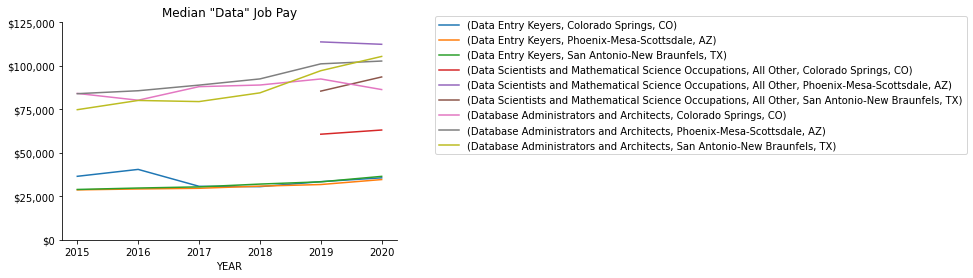

In [26]:
fig, ax = plt.subplots()
for label, grp in ai.groupby(['OCC_TITLE', "AREA_NAME"]):
    grp.plot(x = "YEAR", y = 'A_MEDIAN',ax = ax, label = label)
    
    
plt.yticks(np.arange(0,150000,25000))
ax.yaxis.set_major_formatter('${x:,.0f}')
ax.legend(bbox_to_anchor=(1.1, 1.05))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('Median "Data" Job Pay')
plt.show()